## Peceptron implementation

## Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## Perceptron

In [14]:
def predict(X, w):
    # Calculate net input
    dot_product = (np.dot(X, w[1:]) + w[0])
    
    # Heaviside function
    return np.where(dot_product >= 0.0, 1, -1)
    
X = np.asarray(np.random.normal(0,1, (5)))
w = np.asarray(np.random.normal(0,1, (X.shape[0]+1)))

print ("X:", X)
print ("w:", w)
result = predict(X, w)
print ("result:", result)

X: [-0.26388113 -0.91336782  0.56179779  1.5634204  -1.00250034]
w: [-1.36160419  1.79446512  0.82808591 -1.10048125  1.71293562  0.35915797]
result: -1


In [15]:
# Perceptron classifier
def treina_perceptron(X, y, n_epocas):  
    w = np.zeros(X.shape[1]+1)
    lr = 1
    print ("w pré-treino:", w)
    errors_list = []
    
    for epoc in range(n_epocas):
        errors = 0
        for xi, yi in zip(X, y):
            update = lr * (yi - predict(xi, w))
            w[1:] += (update * xi)
            w[0] += update
            errors += int(update != 0.0)
        errors_list.append(errors)
    return errors_list, w

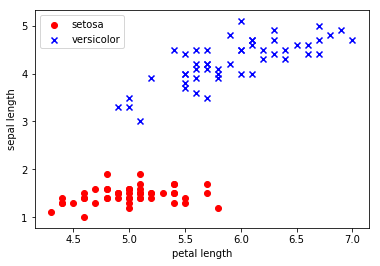

In [16]:
# Iris data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values

y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [17]:
n_epocas = 15

#print ("X:", X)
error_list, w_final = treina_perceptron(X, y, n_epocas)
print ("w pós-treino:", w_final)
print (error_list)

w pré-treino: [0. 0. 0.]
w pós-treino: [-4.  -6.8 18.2]
[2, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


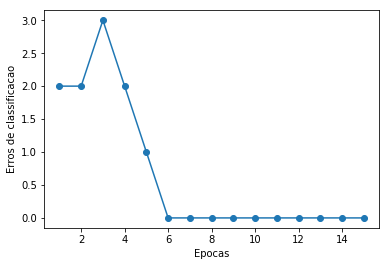

In [18]:
plt.plot(range(1, len(error_list) + 1), error_list, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Erros de classificacao')
plt.show()

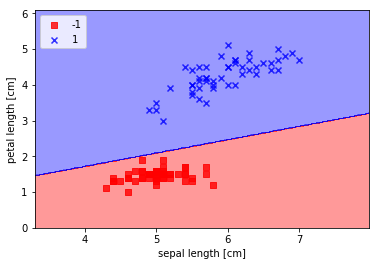

In [19]:
def plot_decision_regions(X, y, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = predict(np.array([xx1.ravel(), xx2.ravel()]).T, w_final)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
    
    
plot_decision_regions(X, y)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

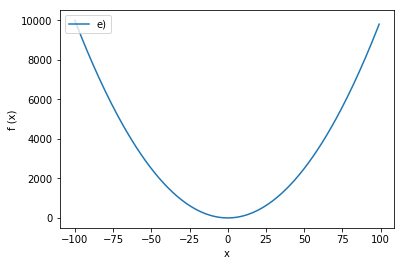

In [20]:
x = np.array([i for i in range (-100,100)])
y = np.array(x**2)
plt.plot(x, y, label='e)')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.legend(loc='upper left')
plt.show()

# Data classification

In [45]:
data = 200

print("\n".join(dataset.data[data].split("\n")[:100]))
print(dataset.target_names[dataset.target[data]])

From: aaronc@athena.mit.edu (Aaron Bryce Cardenas)
Subject: Re: christians and aids
Organization: Massachusetts Institute of Technology
Lines: 94

Paul Conditt writes:
>Yes, it's important to realize that all actions have consequences,
>and that "rules" were made for our own good.  But to suggest that a
>*disease* is a *punishment* for certain types of sin I think is 
>taking things much too far.  
[text deleted]
>Yes, sin can have terrible consequences, but we need to be *real*
>careful when saying that the consequences are a *punishment* for 
>sin.  

I wish that you had followed this thread before jumping to conclusions.
I haven't seen anybody write that AIDS was a *punishment* for certain
types of sin (this includes Mark Ashley who you were responding to
here).  I myself wrote that when you don't do things God's way that
curses will come on you and others.  Although one definition of 'curse'
is 'retribution', I only meant 'harm or misfortune' when I used the
word.  Because God love

In [46]:
dataset.target[:10]

array([4, 4, 2, 2, 2, 4, 5, 0, 0, 3], dtype=int64)

In [47]:
for t in dataset.target[:10]:
    print(dataset.target_names[t])

soc.religion.christian
soc.religion.christian
rec.autos
rec.autos
rec.autos
soc.religion.christian
talk.politics.guns
alt.atheism
alt.atheism
sci.med


In [48]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(dataset.data)
X_train_counts.shape

(3397, 48180)

In [49]:
count_vect.vocabulary_.get(u'algorithm')

7334

In [50]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(3397, 48180)

Transforma uma dataset de booleanos (tem ou não tem uma determinada palavra) em um dataset com as frequências de cada palavra ponderada pelo tamanho do texto

In [51]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3397, 48180)

In [52]:
clf = MultinomialNB().fit(X_train_tfidf, dataset.target)

In [53]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, dataset.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => rec.autos


In [54]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

## cross validation simples, com split de 0.3

In [55]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=0)


text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Acurácia para o conjunto de treinamento

In [56]:
predicted = text_clf.predict(X_train)
np.mean(predicted == y_train)

0.96676482961716448

## Acurácia para o conjunto de testes

In [57]:
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test) 

0.89509803921568631

## K-fold cross validation

In [58]:
error_list_training = []
error_list_testing = []

num_folds = 10
subset_size = int(len(dataset.data)/num_folds)
for i in range(num_folds):
    X_train = np.concatenate((dataset.data[:i*subset_size], dataset.data[(i+1)*subset_size:]), axis=0)
    X_test = dataset.data[i*subset_size:]
    
    
    y_train = np.concatenate((dataset.target[:i*subset_size], dataset.target[(i+1)*subset_size:]), axis=0)
    y_test = dataset.target[i*subset_size:]
    
    # fit the classifier
    text_clf.fit(X_train, y_train)
    
    # evaluate against training this_round
    predicted = text_clf.predict(X_train)
    error_training = np.mean(predicted == y_train)
    error_list_training.append(error_training)
    
    # evaluate against testing this_round
    predicted = text_clf.predict(X_test)
    error_testing = np.mean(predicted == y_test)
    error_list_testing.append(error_testing)

    
print ("Erros no conjunto de treinamento:")
print (error_list_training)
print ("Erro médio do conjunto de treinamento:")
print (np.mean(error_list_training))

print ("Erros no conjunto de teste:")
print (error_list_testing)
print ("Erro médio do conjunto de teste:")
print (np.mean(error_list_testing))

Erros no conjunto de treinamento:
[0.96827992151733155, 0.97187704381948992, 0.96599084368868537, 0.96795291039895359, 0.96860693263570963, 0.97482014388489213, 0.9699149771092217, 0.97155003270111184, 0.97285807717462391, 0.96926095487246566]
Erro médio do conjunto de treinamento:
0.97011118378
Erros no conjunto de teste:
[0.96673535472475713, 0.96599084368868537, 0.95807282089003309, 0.9605042016806723, 0.96570308672219496, 0.96886016451233847, 0.96845194424064562, 0.9619140625, 0.94306569343065694, 0.9277456647398844]
Erro médio do conjunto de teste:
0.958704383713
